In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-shopee-code-league-marketing-analytics/users.csv
/kaggle/input/student-shopee-code-league-marketing-analytics/sample_submission_0_1.csv
/kaggle/input/student-shopee-code-league-marketing-analytics/train.csv
/kaggle/input/student-shopee-code-league-marketing-analytics/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/train.csv')
test = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/test.csv')
users = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/users.csv')

print("Train:", train.shape)
print("Test:", test.shape)
print('Users:', users.shape)

Train: (73539, 18)
Test: (55970, 17)
Users: (127886, 6)


In [3]:
df = pd.concat((train, test))
df = pd.merge(df, users, how='left', on = 'user_id')
df.reset_index(drop=True, inplace=True)

In [4]:
df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,0,5,10,0.0,0,1.0,1.0,2.0,47.0,@gmail.com
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,1,1,4,1.0,1,1.0,1.0,2.0,25.0,@hotmail.com
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,5,19,27,0.0,2,NaN,1.0,0.0,NaN,@yahoo.com
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,1,3,6,0.0,3,1.0,1.0,2.0,24.0,@yahoo.com
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,0,0,0,0.0,4,NaN,1.0,0.0,NaN,@hotmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129504,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,...,0,0,0,NaN,55965,NaN,1.0,0.0,NaN,@gmail.com
129505,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,...,0,0,0,NaN,55966,NaN,1.0,0.0,NaN,@gmail.com
129506,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,...,0,0,0,NaN,55967,NaN,1.0,0.0,NaN,@hotmail.com
129507,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,...,0,0,0,NaN,55968,NaN,1.0,0.0,NaN,@gmail.com


In [5]:
df['open_flag'][73539:].value_counts()

Series([], Name: open_flag, dtype: int64)

In [6]:
import datetime
def convert_date(x):
    item = x.split(' ')[0]
    date = datetime.datetime.strptime(item, "%Y-%m-%d").date()
    num_days = (datetime.date(2020, 8, 1) - date).days
    return num_days

df['grass_date'] = df['grass_date'].apply(convert_date)
df['grass_date']

0         382
1         382
2         382
3         382
4         382
         ... 
129504    307
129505    307
129506    307
129507    307
129508    307
Name: grass_date, Length: 129509, dtype: int64

In [7]:
# ### Get variable from date
# df['grass_date'] = pd.to_datetime(df['grass_date'])

# df['day'] = df['grass_date'].dt.day.astype('category')
# df['dayofweek'] = df['grass_date'].dt.dayofweek.astype('category')
# df['month'] = df['grass_date'].dt.month.astype('category')



**Xử lý các cột login và checkout**

In [8]:
df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id', 'attr_1',
       'attr_2', 'attr_3', 'age', 'domain'],
      dtype='object')

In [9]:
col = ['login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days']

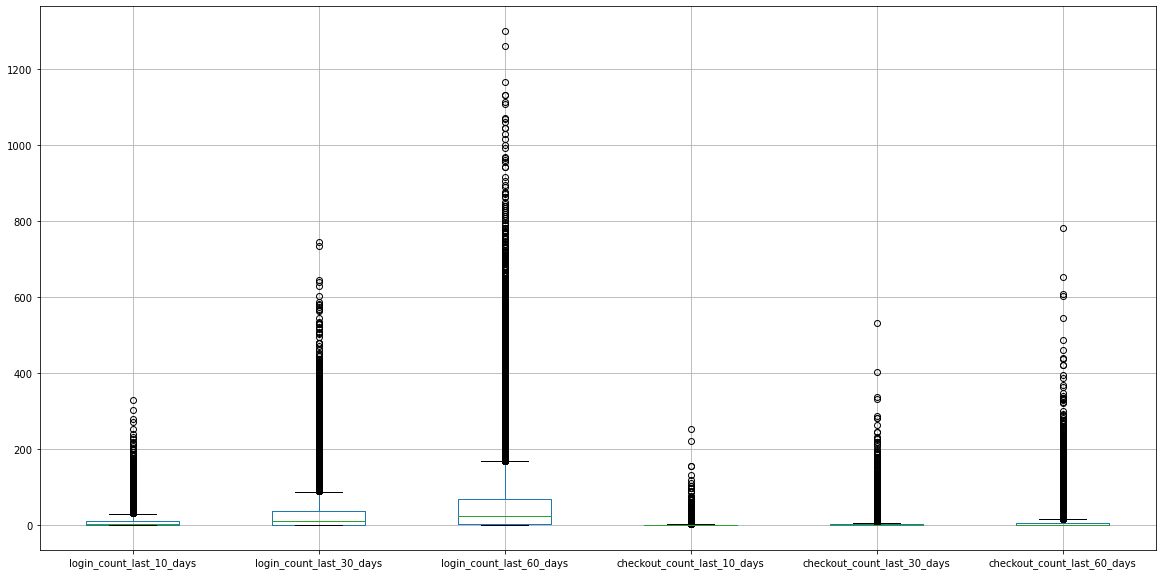

In [10]:
df.boxplot(column=col, figsize=(20, 10))


In [11]:
#login_count_last_60_days
df['login_count_last_60_days'].values[df['login_count_last_60_days'].values > 900] = 900
df['login_count_last_30_days'].values[df['login_count_last_30_days'].values > 450] = 450
df['login_count_last_10_days'].values[df['login_count_last_10_days'].values > 200] = 200

#checkout_count_last_10_days
df['checkout_count_last_10_days'].values[df['checkout_count_last_10_days'].values > 150] = 150
df['checkout_count_last_30_days'].values[df['checkout_count_last_30_days'].values > 300] = 300
df['checkout_count_last_60_days'].values[df['checkout_count_last_60_days'].values > 650] = 650

In [12]:
#open_count_last_10_days_log
df['open_count_last_10_days_log'] = np.log(df['open_count_last_10_days'] + 1)
df['open_count_last_30_days_log'] = np.log(df['open_count_last_30_days'] + 1)
df['open_count_last_60_days_log'] = np.log(df['open_count_last_60_days'] + 1)

In [13]:
#age
### Make "age_class"
def make_age_class(dataset) :
    df = dataset.copy()
    
    # For NaN values
    df['age_class'] = df['age'].isna()
    df['age_class'] = df['age_class'].map({True:'Unknown',False:'<>'})
    
    # Make class for '>=30' and '<30' age
    df.loc[df['age']>=30, 'age_class'] = '>=30'
    df.loc[df['age']<30, 'age_class'] = '<30'
    
    return df

df = make_age_class(df)

In [14]:
# ### Make 'domain_type'
# list_low_domain = ['@163.com','@gmail.com','@yahoo.com','@ymail.com']
# list_med_domain = ['@outlook.com','@qq.com','@rocketmail.com']
# list_high_domain = ['@hotmail.com','@icloud.com','@live.com','other']

# def make_domain_type(dom) :
#     if dom in list_low_domain :
#         res = 'low_domain'
#     elif dom in list_med_domain :
#         res = 'med_domain'
#     elif dom in list_high_domain :
#         res = 'high_domain'
        
#     return res

# df['domain_type'] = df.apply(lambda x : make_domain_type(x['domain']), axis=1)

# **Build Model**

In [15]:
# df.drop(['row_id'], axis=1, inplace=True)

In [16]:
# df['domain'] = df['domain'].astype('category')

In [17]:

# import matplotlib.pyplot as plt

# plt.plot(df.index,df.row_id)
# plt.title('row_id - index')
# plt.xlabel('index')
# plt.ylabel('row_id')
# plt.show()

In [18]:
df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id', 'attr_1',
       'attr_2', 'attr_3', 'age', 'domain', 'open_count_last_10_days_log',
       'open_count_last_30_days_log', 'open_count_last_60_days_log',
       'age_class'],
      dtype='object')

In [19]:
df.replace(['Never checkout', 'Never open', 'Never login'], np.nan, inplace=True)

In [20]:
df.subject_line_length

0         44
1         44
2         49
3         49
4         49
          ..
129504    53
129505    53
129506    43
129507    43
129508    53
Name: subject_line_length, Length: 129509, dtype: int64

In [21]:
df.columns

Index(['country_code', 'grass_date', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id', 'attr_1',
       'attr_2', 'attr_3', 'age', 'domain', 'open_count_last_10_days_log',
       'open_count_last_30_days_log', 'open_count_last_60_days_log',
       'age_class'],
      dtype='object')

In [22]:
col = ['country_code', 'user_id', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'open_flag', 'row_id', 'attr_1',
       'attr_2', 'attr_3', 'age', 'open_count_last_10_days_log',
       'open_count_last_30_days_log', 'open_count_last_60_days_log']

In [23]:
df[col] = df[col].astype('float')
df['domain'] = df['domain'].astype('category')
df['age_class'] = df['age_class'].astype('category')

In [24]:
### Initialize h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr4w3vxyz
  JVM stdout: /tmp/tmpr4w3vxyz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr4w3vxyz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_3nzzip
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [25]:
### Define predictor and response
X = ['country_code', 'grass_date', 'subject_line_length',
     'last_open_day', 'last_login_day', 'last_checkout_day',
     'open_count_last_10_days', 'open_count_last_30_days',
     'open_count_last_60_days', 'login_count_last_10_days',
     'login_count_last_30_days', 'login_count_last_60_days',
     'checkout_count_last_10_days', 'checkout_count_last_30_days',
     'checkout_count_last_60_days', 'attr_1', 'attr_2',
     'attr_3', 'age_class', 'open_count_last_10_days_log', 'domain',
     'open_count_last_30_days_log', 'open_count_last_60_days_log']
Y = 'open_flag'

list_col = X + [Y]

In [26]:
df_comb_train = df[:73539]
df_comb_test = df[73539:]

In [27]:
### Make H2O Frame
h2o_train = h2o.H2OFrame(df_comb_train[list_col])
h2o_test = h2o.H2OFrame(df_comb_test[X])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
h2o_train[['age_class', 'domain']] = h2o_train[['age_class', 'domain']].asfactor()
h2o_test[['age_class', 'domain']] = h2o_test[['age_class', 'domain']].asfactor()
    
h2o_train[Y] = h2o_train[Y].asfactor()

In [29]:
### Make all H2O baseline model
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import time

def h2o_compare_models(df_train, df_test, X, Y) :
    
    start = time.time()
    
    # Initialize all model (Ganti family/distributionnya)
    glm = H2OGeneralizedLinearEstimator(family='binomial', nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    gbm = H2OGradientBoostingEstimator(distribution='bernoulli', nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    xgb = H2OXGBoostEstimator(distribution='bernoulli', nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                              nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    rf = H2ORandomForestEstimator(distribution='bernoulli', nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    ext = H2ORandomForestEstimator(distribution='bernoulli', histogram_type="Random",
                                  nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    
    # Train model
    glm.train(x=X, y=Y, training_frame=df_train)
    gbm.train(x=X, y=Y, training_frame=df_train)
    xgb.train(x=X, y=Y, training_frame=df_train)
    lgbm.train(x=X, y=Y, training_frame=df_train)
    rf.train(x=X, y=Y, training_frame=df_train)
    ext.train(x=X, y=Y, training_frame=df_train)
    
    # Calculate train metrics (Bisa diganti)
    from sklearn.metrics import matthews_corrcoef
    train_glm = matthews_corrcoef(h2o_train[Y].as_data_frame(), glm.predict(h2o_train)['predict'].as_data_frame())
    train_gbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), gbm.predict(h2o_train)['predict'].as_data_frame())
    train_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), xgb.predict(h2o_train)['predict'].as_data_frame())
    train_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), lgbm.predict(h2o_train)['predict'].as_data_frame())
    train_rf = matthews_corrcoef(h2o_train[Y].as_data_frame(), rf.predict(h2o_train)['predict'].as_data_frame())
    train_ext = matthews_corrcoef(h2o_train[Y].as_data_frame(), ext.predict(h2o_train)['predict'].as_data_frame())

    # Calculate CV metrics for all model (Bisa diganti)
    met_glm = matthews_corrcoef(h2o_train[Y].as_data_frame(), glm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_gbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), gbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), xgb.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), lgbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_rf = matthews_corrcoef(h2o_train[Y].as_data_frame(), rf.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_ext = matthews_corrcoef(h2o_train[Y].as_data_frame(), ext.cross_validation_holdout_predictions()['predict'].as_data_frame())
    
    # Make result dataframe
    result = pd.DataFrame({'Model':['GLM','GBM','XGB','LGBM','RF','ExtraTree'],
                          'Train Metrics':[train_glm,train_gbm,train_xgb,train_lgbm,train_rf,train_ext],
                          'CV Metrics':[met_glm,met_gbm,met_xgb,met_lgbm,met_rf,met_ext]})
    
    end = time.time()
    print('Time Used :',(end-start)/60)
    
    return result.sort_values('CV Metrics') 

In [30]:
### Compare models
res = h2o_compare_models(h2o_train, h2o_test, X, Y) 
res

glm Model Build progress: |███████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Time Used : 5.22623658180236

,Model,Train Metrics,CV Metrics
0,GLM,0.497301,0.497749
5,ExtraTree,0.880664,0.520004
4,RF,0.929440,0.523262
1,GBM,0.548362,0.532170
2,XGB,0.613744,0.536380
3,LGBM,0.614784,0.538084


In [31]:
### Make model for submission
lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                              nfolds=5, keep_cross_validation_predictions=True, fold_assignment='Modulo',
                              ntrees=1000, stopping_rounds = 5, stopping_tolerance = 1e-4, stopping_metric = "logloss",
                              sample_rate=0.8, col_sample_rate=0.8, score_tree_interval=1)
lgbm.train(x=X, y=Y, training_frame=h2o_train)  

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [32]:
### Score
from sklearn.metrics import matthews_corrcoef
train_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), lgbm.predict(h2o_train)['predict'].as_data_frame())
met_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), lgbm.cross_validation_holdout_predictions()['predict'].as_data_frame())

print('Train Score :',train_lgbm)
print('CV Score :',met_lgbm)

xgboost prediction progress: |████████████████████████████████████████████| 100%
Train Score : 0.5903789680962708
CV Score : 0.5362847522717356


In [33]:
### Make submission
pred = lgbm.predict(h2o_test)['predict'].as_data_frame()
sub = pd.read_csv('../input/student-shopee-code-league-marketing-analytics/sample_submission_0_1.csv')
sub['open_flag'] = pred

sub.to_csv('subs_lgbm.csv', index=False)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [34]:
sub

,row_id,open_flag
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,0


In [35]:
# xgb = xgb = H2OXGBoostEstimator(distribution='bernoulli', 
#                                 nfolds=5, 
#                                 keep_cross_validation_predictions=True, 
#                                 fold_assignment='Modulo')
# xgb.train(x=X, y=Y, training_frame=h2o_train)

In [36]:
# ### Score
# from sklearn.metrics import matthews_corrcoef
# train_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), xgb.predict(h2o_train)['predict'].as_data_frame())
# met_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), xgb.cross_validation_holdout_predictions()['predict'].as_data_frame())

# print('Train Score :',train_xgb)
# print('CV Score :',met_xgb)

In [37]:
# ### Make submission
# pred = xgb.predict(h2o_test)['predict'].as_data_frame()
# sub = pd.read_csv('../input/student-shopee-code-league-marketing-analytics/sample_submission_0_1.csv')
# sub['open_flag'] = pred

# # sub.to_csv('subs_lgbm_2.csv', index=False)